<a href="https://colab.research.google.com/github/HEMA804/HEMA804/blob/main/chrun_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installing Necessary Packages
!pip install streamlit scikit-learn
!npm install localtunnel
!pip install pandas-profiling
!pip install sweetviz
!pip install autoviz
!pip install ydata_profiling
!pip install markupsafe==2.0.1
!pip install --upgrade markupsafe Jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.3 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 22 packages in 6s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏Collecting pandas-profiling
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.3 MB/s eta 0:00:00
   ━━━

In [7]:
#Importing Libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold

#Loading the Data
df=pd.read_csv("/content/telco-customer-churn.csv")

In [8]:
#finding the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Feature Description

**1. customerID**

Description: A unique identifier assigned to each customer.

Role: Used for customer identification. It doesn’t contribute directly to churn prediction but helps track customers.

**2. gender**

Description: The gender of the customer (e.g., Male, Female).

Role: Helps in understanding if there is a correlation between gender and churn.

**3. SeniorCitizen**

Description: Indicates if the customer is a senior citizen.
Typically encoded as:
0: Not a senior citizen
1: Senior citizen

Role: Senior citizens may have different service usage
patterns, which could influence churn.

**4. Partner**

Description: Indicates if the customer has a partner (Yes/No).

Role: Having a partner may reflect lifestyle factors that could affect churn behavior.

**5. Dependents**

Description: Indicates if the customer has dependents (Yes/No).

Role: Customers with dependents might have different spending habits or service requirements.

**6. tenure**

Description: The number of months the customer has been with the company.

Role: A critical feature in churn analysis; longer tenure often suggests loyalty, whereas shorter tenure may indicate a higher likelihood of churn.

**7. PhoneService**

Description: Indicates if the customer has a phone service (Yes/No).

Role: Customers with or without phone service may show different churn patterns.

**8. MultipleLines**

Description: Indicates if the customer has multiple phone
lines (e.g., No, Yes, No phone service).

Role: Customers with multiple lines might be more invested in the service, potentially reducing churn risk.

**9. InternetService**

Description: The type of internet service subscribed by the customer (e.g., DSL, Fiber optic, No).

Role: Fiber optic users may exhibit different churn patterns due to costs or service quality compared to DSL users.

**10. OnlineSecurity**

Description: Indicates if the customer has subscribed to online security services (Yes/No).

Role: Value-added services like online security can increase
customer retention.

**11. OnlineBackup**

Description: Indicates if the customer has subscribed to online backup services (Yes/No).

Role: Customers with additional services like backup might be less likely to churn.

**12. DeviceProtection**

Description: Indicates if the customer has device protection services (Yes/No).

Role: Another value-added service that could influence customer loyalty.

**13. TechSupport**

Description: Indicates if the customer has opted for technical support services (Yes/No).

Role: Customers with access to tech support may experience fewer issues and thus churn less.

**14. StreamingTV**

Description: Indicates if the customer has streaming TV services (Yes/No).

Role: Streaming services add value and may impact churn based on customer satisfaction.

**15. StreamingMovies**

Description: Indicates if the customer has streaming movie services (Yes/No).

Role: Similar to StreamingTV, this feature can reflect customer engagement and satisfaction.

**16.Contract**

Description: The type of contract the customer has (e.g., Month-to-month, One year, Two year).

Role: One of the most critical features for churn prediction. Customers with longer contracts are generally less likely to churn compared to month-to-month customers.

**17. PaperlessBilling**

Description: Indicates if the customer has opted for paperless billing (Yes/No).

Role: Paperless billing may reflect a customer’s tech-savviness or satisfaction with modern conveniences.

**18. PaymentMethod**

Description: The method of payment chosen by the customer (e.g., Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

Role: Payment methods like electronic checks might indicate potential for churn, as they could correlate with dissatisfaction or irregular payments.

**19. MonthlyCharges**

Description: The monthly amount billed to the customer.

Role: Higher monthly charges might increase churn risk, especially for budget-conscious customers.

**20. TotalCharges**

Description: The total amount billed to the customer over their tenure.

Role: Helps in understanding the customer’s overall value and their investment in the service.

**21. Churn**

Description: The target variable indicating whether the customer has churned (Yes/No).

Role: The key feature to predict using the other variables.


In [9]:
#Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Analysing Descriptive Statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.shape

(7043, 21)

In [12]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [13]:
df.isnull().sum().sum()

0

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric
df.isnull().sum().sum()

11

0.961642499724251


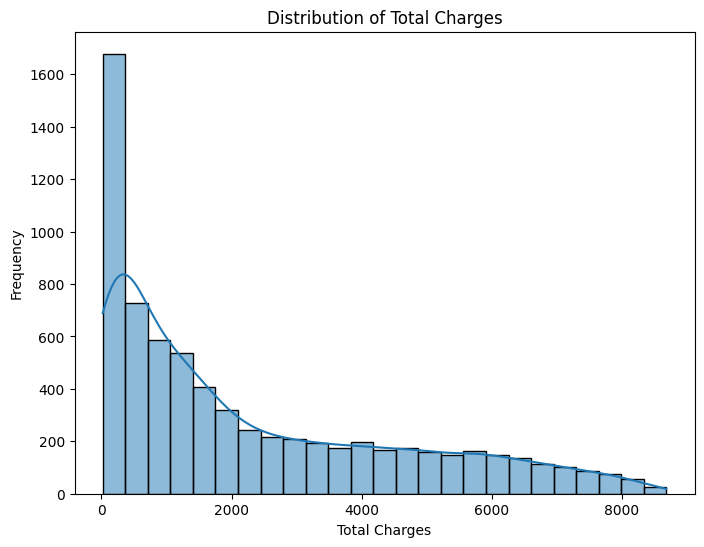

In [15]:
# Analyze the skew of 'TotalCharges'
print(df['TotalCharges'].skew())

# Interpretation of Skewness:
# A positive skew indicates that the tail on the right side of the distribution is longer or fatter.
# In the context of 'TotalCharges', a positive skew suggests that there are some customers with exceptionally high total charges, while the majority of customers have lower total charges.  This is common in billing data.

# Visualize the distribution to confirm skew
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalCharges'], kde=True)  # Include a kernel density estimate
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()



<ipython-input-16-dd6a8e6d53f1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True) #Replace with the median or mean depending on your needs


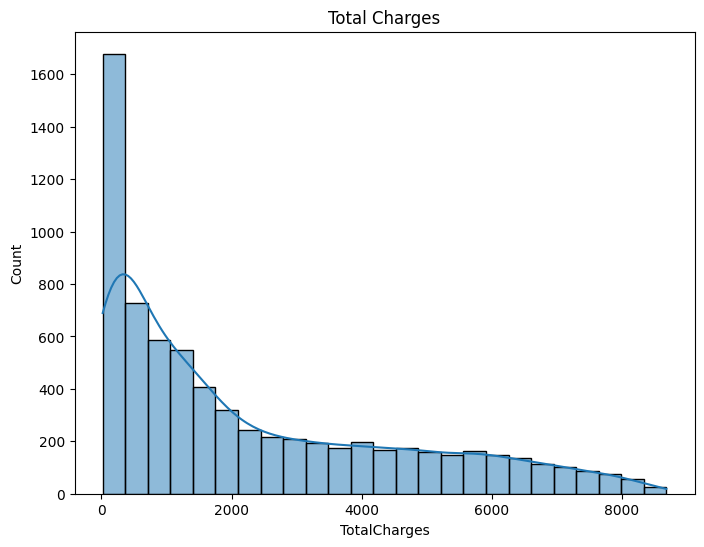

In [16]:
#Handling Missing Value
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True) #Replace with the median or mean depending on your needs

# Visualize after fillna
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Total Charges')
plt.show()

Analysis for gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


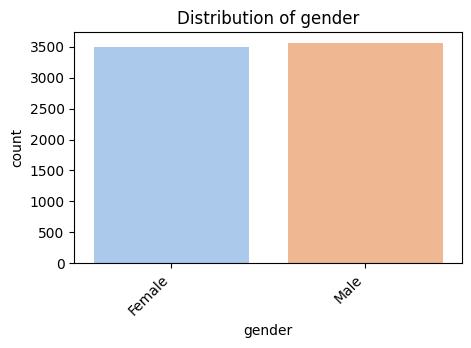

--------------------------------------------------
Analysis for Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


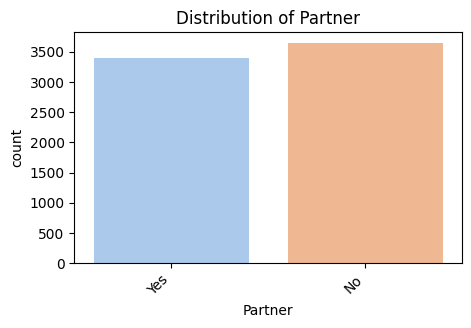

--------------------------------------------------
Analysis for Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


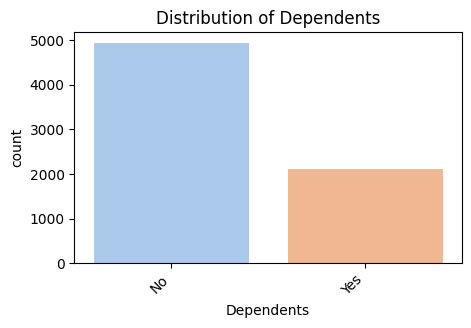

--------------------------------------------------
Analysis for PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


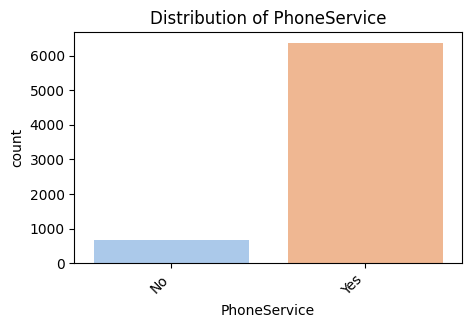

--------------------------------------------------
Analysis for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


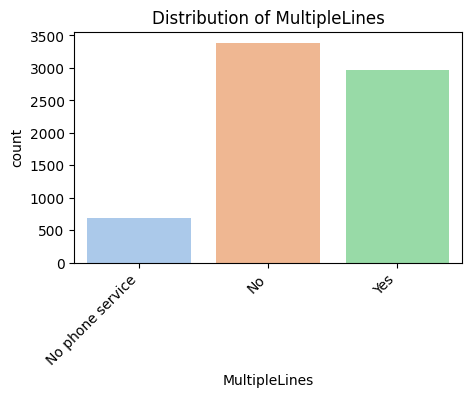

--------------------------------------------------
Analysis for OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


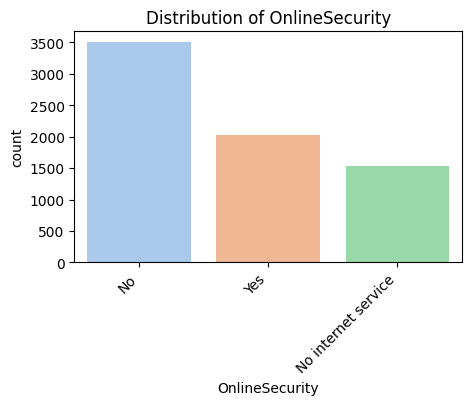

--------------------------------------------------
Analysis for OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


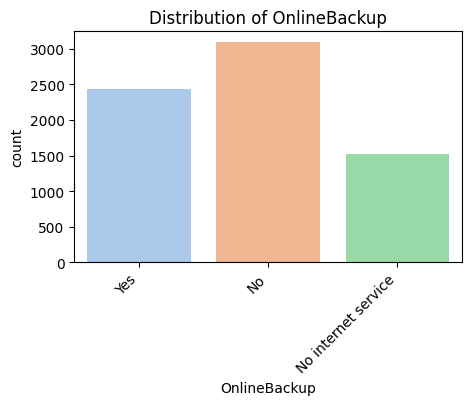

--------------------------------------------------
Analysis for DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


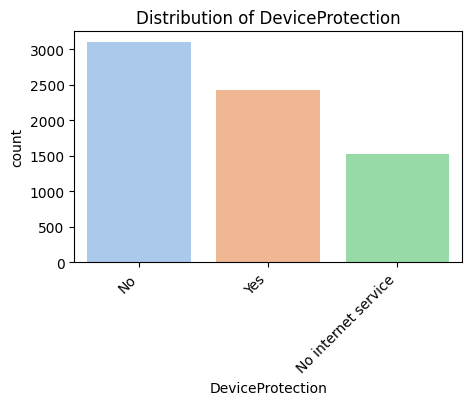

--------------------------------------------------
Analysis for TechSupport:
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


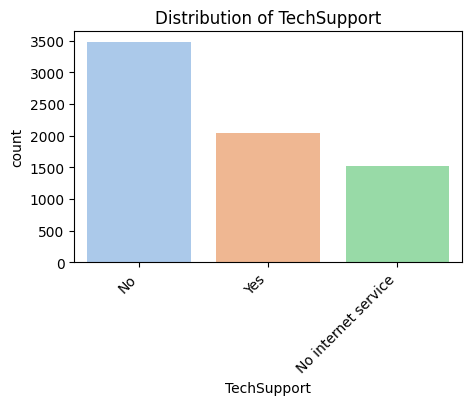

--------------------------------------------------
Analysis for StreamingTV:
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


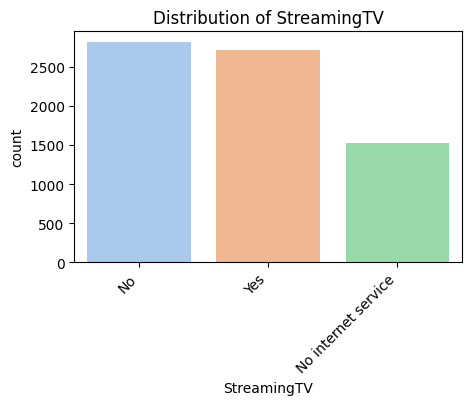

--------------------------------------------------
Analysis for StreamingMovies:
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


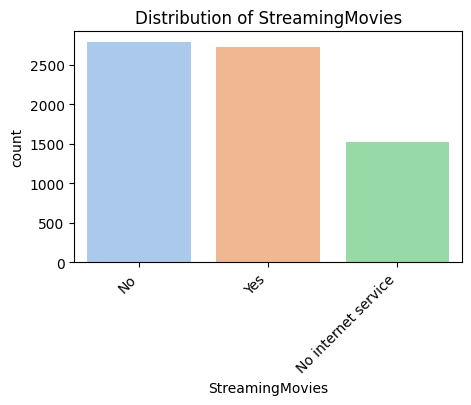

--------------------------------------------------
Analysis for Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


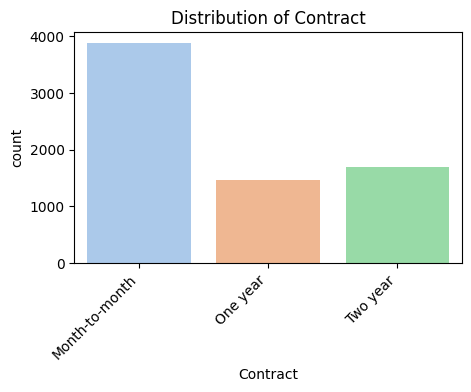

--------------------------------------------------
Analysis for PaperlessBilling:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


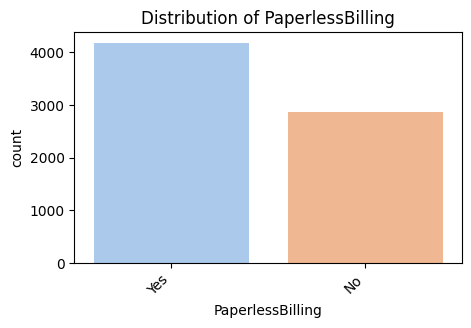

--------------------------------------------------
Analysis for PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


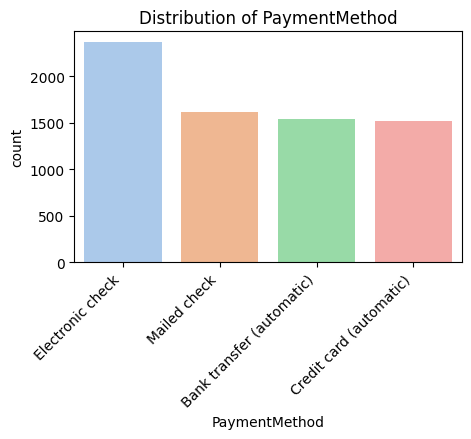

--------------------------------------------------
Analysis for Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


<ipython-input-17-c580a17ce666>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='pastel')


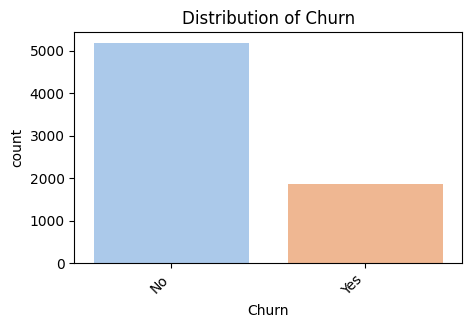

--------------------------------------------------
Analysis for tenure:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


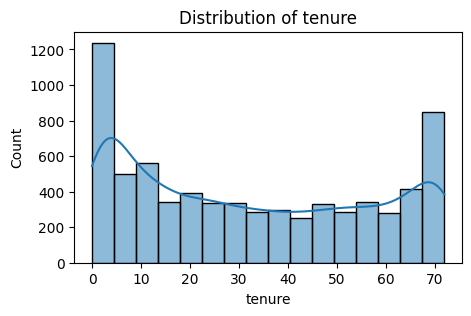

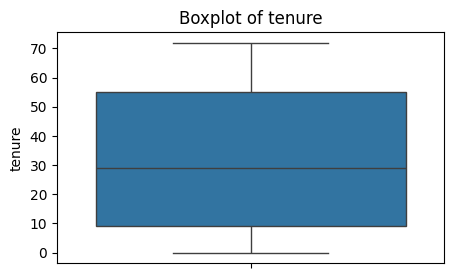

--------------------------------------------------
Analysis for MonthlyCharges:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


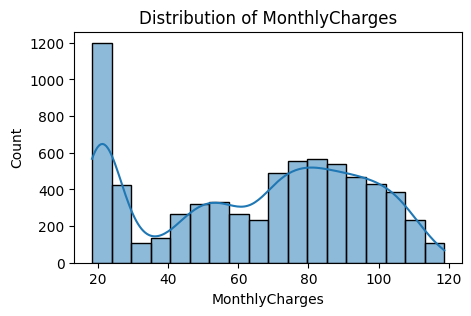

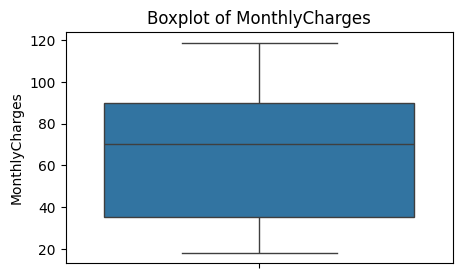

--------------------------------------------------
Analysis for TotalCharges:
count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


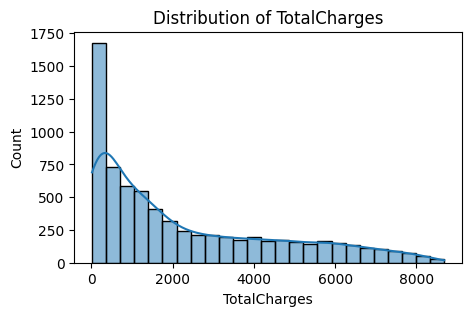

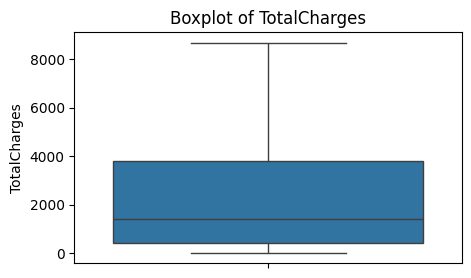

--------------------------------------------------


In [17]:
#univariate analysis

# Univariate Analysis for categorical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod', 'Churn']

for feature in categorical_features:
    print(f"Analysis for {feature}:")
    print(df[feature].value_counts())
    plt.figure(figsize=(5, 3))
    sns.countplot(x=feature, data=df, palette='pastel')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.show()
    print("-" * 50)  # Separator between features

# Univariate Analysis for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    print(f"Analysis for {feature}:")
    print(df[feature].describe())
    plt.figure(figsize=(5, 3))
    sns.histplot(df[feature],kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()
    print("-" * 50)

In [18]:
#Boxcox Transformation on Total Charges To reduce skewness.
from scipy.stats import boxcox

df['TotalCharges_boxcox'], _ = boxcox(df['TotalCharges'] + 1e-6)  # Add a small constant if zeros exist


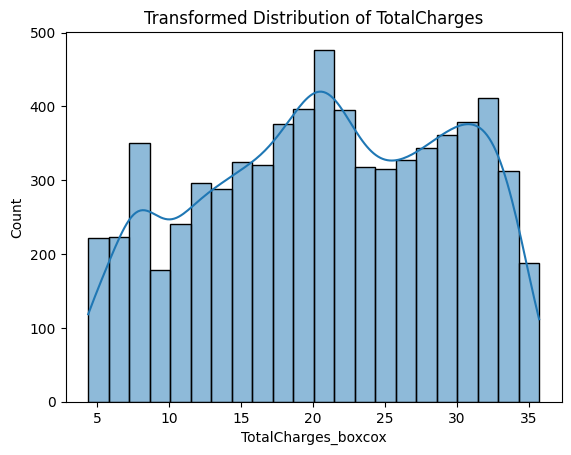

In [19]:
#After Transformation
sns.histplot(df['TotalCharges_boxcox'], kde=True)
plt.title("Transformed Distribution of TotalCharges")
plt.show()


In [20]:
# drop Totalcharges and rename Totalcharges_box cox in to Total charges

# Drop the original 'TotalCharges' column
df.drop('TotalCharges', axis=1, inplace=True)

# Rename 'TotalCharges_boxcox' to 'TotalCharges'
df.rename(columns={'TotalCharges_boxcox': 'TotalCharges'}, inplace=True)

In [21]:
# Features and target
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

In [22]:

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod']

In [23]:
#Creating Transformers for Numerical and Categorical Features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [24]:
numerical_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [25]:
categorical_transformer

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [26]:

# 5. Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [27]:
feature_selector = SelectKBest(score_func=mutual_info_classif, k=10)

In [28]:
#Classification Models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42)

}
models

{'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
 'SVC': SVC(probability=True, random_state=42),
 'NaiveBayes': GaussianNB(),
 'KNN': KNeighborsClassifier(),
 'RandomForest': RandomForestClassifier(random_state=42),
 'DecisionTree': DecisionTreeClassifier(random_state=42)}

In [29]:
 #7. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results={}
#Creating a Pipeline
for model_name,model in models.items():
  pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('feature_selector', feature_selector),
                         ('classifier', model)])
  pipe.fit(X_train,y_train)
  y_pred=pipe.predict(X_test)
  cv_scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')
  results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'CV Mean Accuracy': cv_scores.mean(),
        'CV Std Dev': cv_scores.std()
  }



In [31]:
# Fit the feature selector on the transformed training data
X_train_transformed = preprocessor.fit_transform(X_train)
feature_selector.fit(X_train_transformed, y_train)

# Get selected feature indices from the transformed data
selected_feature_indices = feature_selector.get_support()

# Get the names of selected features from the original data (before preprocessing)
# This is necessary to avoid index errors because indices are not preserved after preprocessing
all_feature_names = preprocessor.get_feature_names_out()
selected_features = [all_feature_names[i] for i, is_selected in enumerate(selected_feature_indices) if is_selected]

print("Selected features:", selected_features)

Selected features: ['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges', 'cat__OnlineSecurity_No', 'cat__OnlineSecurity_No internet service', 'cat__TechSupport_No', 'cat__TechSupport_No internet service', 'cat__Contract_Month-to-month', 'cat__Contract_Two year', 'cat__PaymentMethod_Electronic check']


In [32]:
print("Model Comparison Results:")
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Model Comparison Results:

Model: LogisticRegression
  Accuracy: 0.8070
  CV Mean Accuracy: 0.7985
  CV Std Dev: 0.0096

Model: SVC
  Accuracy: 0.8062
  CV Mean Accuracy: 0.7998
  CV Std Dev: 0.0118

Model: NaiveBayes
  Accuracy: 0.7147
  CV Mean Accuracy: 0.7238
  CV Std Dev: 0.0142

Model: KNN
  Accuracy: 0.7807
  CV Mean Accuracy: 0.7832
  CV Std Dev: 0.0090

Model: RandomForest
  Accuracy: 0.7757
  CV Mean Accuracy: 0.7811
  CV Std Dev: 0.0056

Model: DecisionTree
  Accuracy: 0.7339
  CV Mean Accuracy: 0.7297
  CV Std Dev: 0.0069


In [33]:
 # Hyperparameter Tuning using GridSearchCV
param_grids = {
    'LogisticRegression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga'] #Suitable solvers for L1 and L2
    },
    'SVC': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'RandomForest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'DecisionTree': {
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__criterion':['gini','entropy','log_loss']
    }
}

best_models = {}
for model_name, model in models.items():
    if model_name in param_grids:
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('feature_selector', feature_selector),
                             ('classifier', model)])
        grid_search = GridSearchCV(pipe, param_grids[model_name], cv=cv, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation score for {model_name}: {grid_search.best_score_:.4f}")
        grid_search.best_estimator_.fit(X_train, y_train)
        y_pred = grid_search.best_estimator_.predict(X_test)
        results[model_name]['Best Accuracy'] = accuracy_score(y_test, y_pred)
        print(f"Test accuracy for {model_name}: {results[model_name]['Best Accuracy']:.4f}")


Best hyperparameters for LogisticRegression: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best cross-validation score for LogisticRegression: 0.7984
Test accuracy for LogisticRegression: 0.8041
Best hyperparameters for SVC: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best cross-validation score for SVC: 0.7969
Test accuracy for SVC: 0.8055
Best hyperparameters for KNN: {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
Best cross-validation score for KNN: 0.7769
Test accuracy for KNN: 0.7892
Best hyperparameters for RandomForest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation score for RandomForest: 0.7906
Test accuracy for RandomForest: 0.8119
Best hyperparameters for DecisionTree: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 5}
Best cross-validation score for DecisionTree:

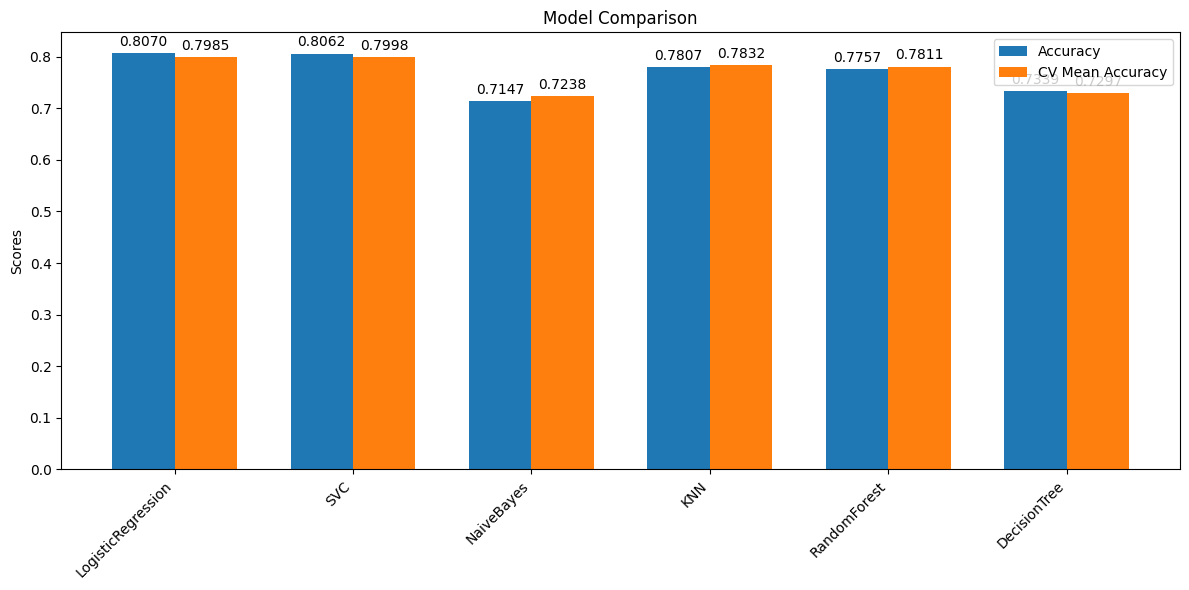

In [34]:
#Visualize the Comparison of Models

import matplotlib.pyplot as plt

# Assuming 'results' dictionary is available from the previous code

model_names = list(results.keys())
accuracy_scores = [results[model]['Accuracy'] for model in model_names]
cv_mean_scores = [results[model]['CV Mean Accuracy'] for model in model_names]

x_pos = np.arange(len(model_names))
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x_pos - width/2, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x_pos + width/2, cv_mean_scores, width, label='CV Mean Accuracy')


ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation=45, ha='right') # Rotate x-axis labels for better readability
ax.legend()

# Add text labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

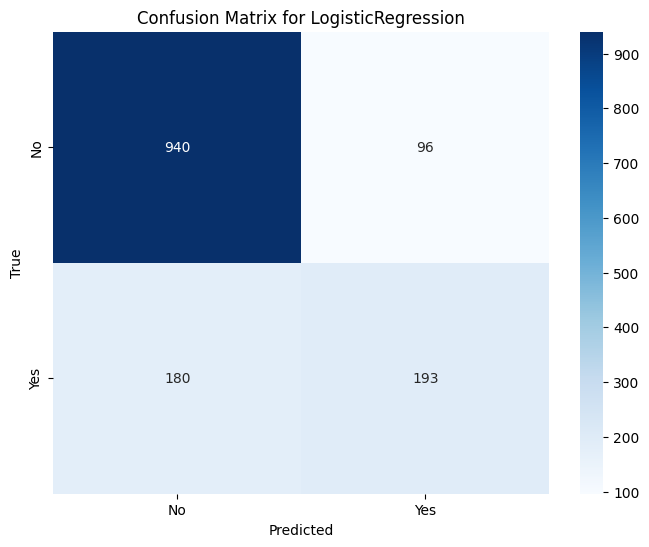

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1036
         Yes       0.67      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



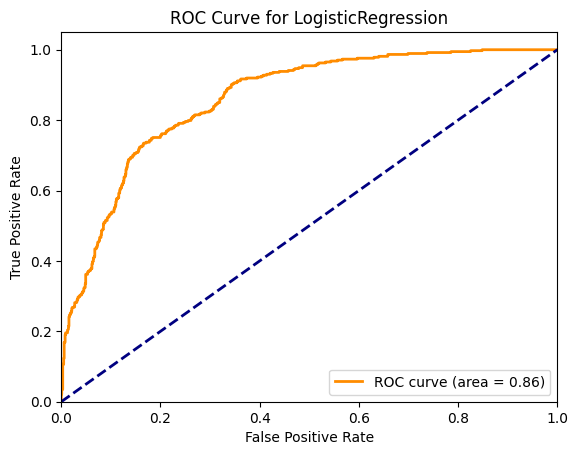

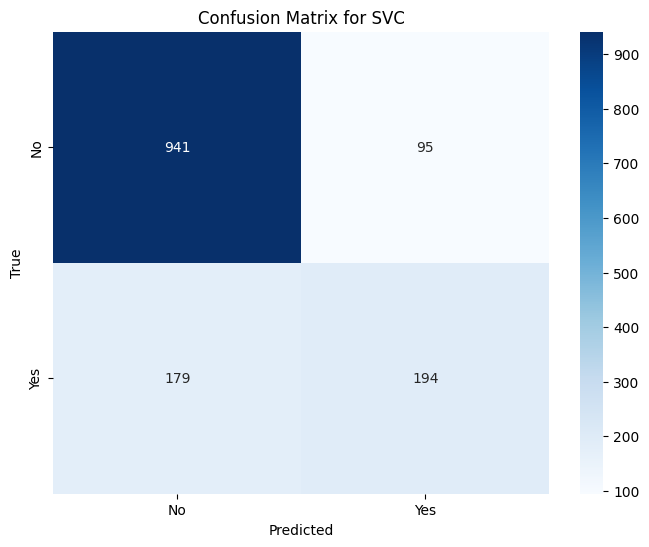

Classification Report for SVC:
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1036
         Yes       0.67      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



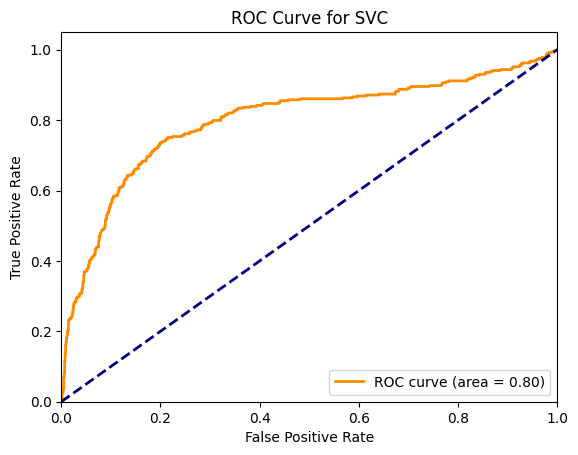

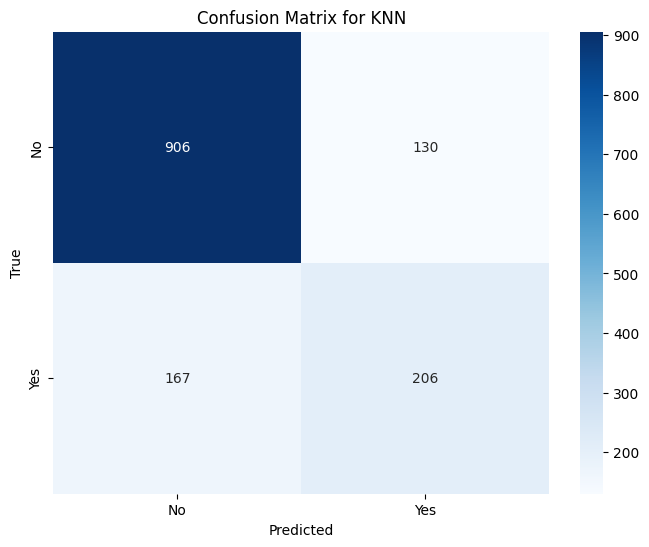

Classification Report for KNN:
              precision    recall  f1-score   support

          No       0.84      0.87      0.86      1036
         Yes       0.61      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



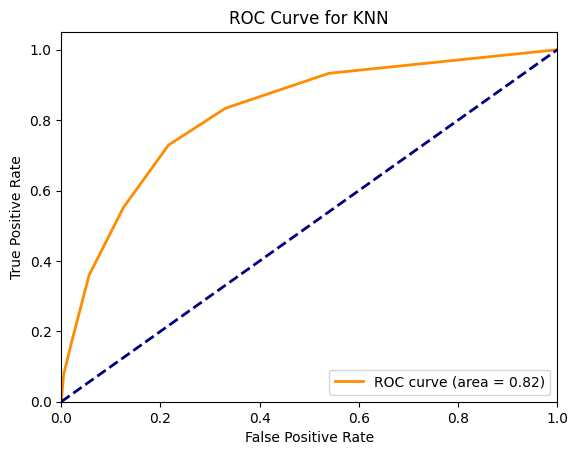

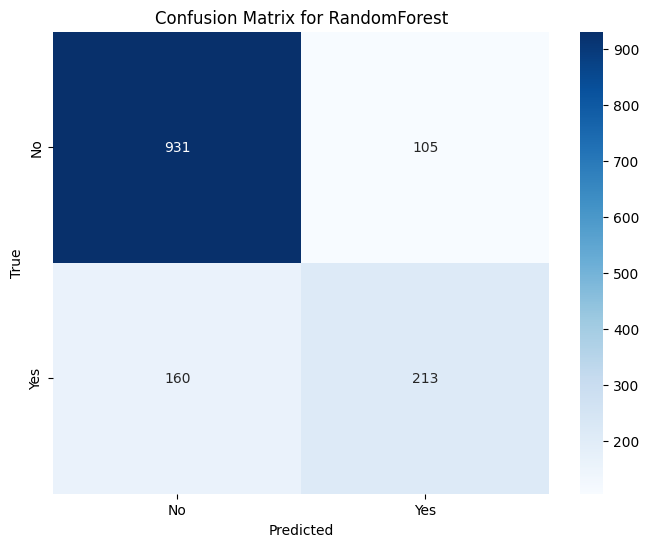

Classification Report for RandomForest:
              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1036
         Yes       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.80      0.81      0.81      1409



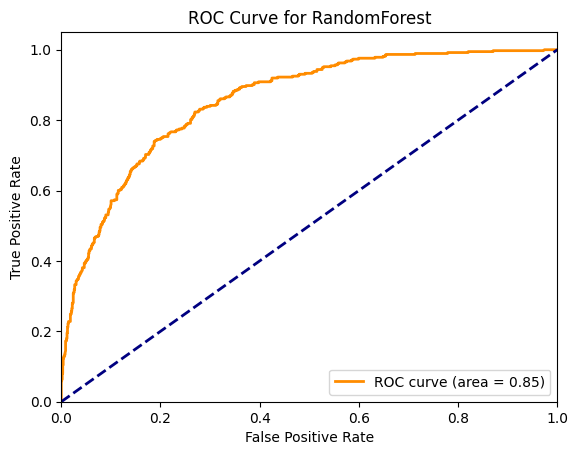

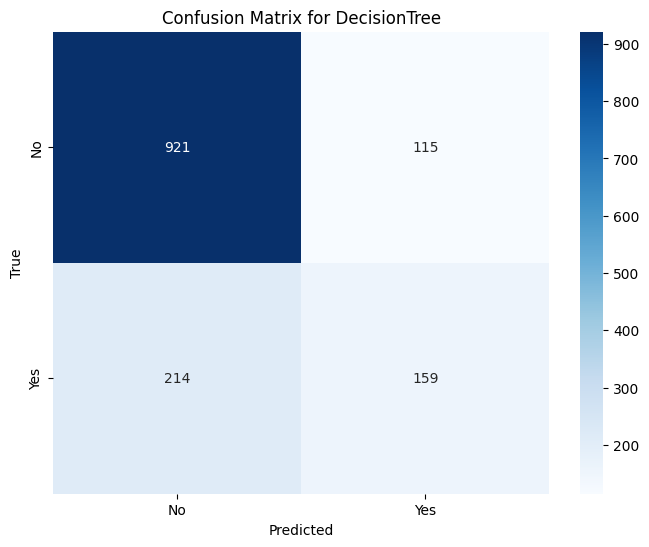

Classification Report for DecisionTree:
              precision    recall  f1-score   support

          No       0.81      0.89      0.85      1036
         Yes       0.58      0.43      0.49       373

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.75      0.77      0.75      1409



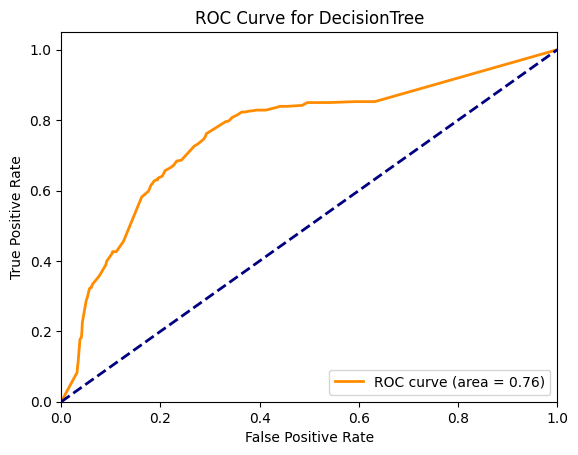

In [35]:
# prompt: Heat map for Confusion matrix, Classification report and ROC AUC Curve, Cross entropy

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Assuming 'best_models' dictionary contains your trained models
# and X_test, y_test are your test data

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification Report
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

    # ROC AUC Curve (only for models that provide probabilities)
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        y_test_numeric = y_test.map({'No': 0, 'Yes': 1})
        fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc="lower right")
        plt.show()

2025-02-25 16:45:38.411 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 16:45:38.540 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-25 16:45:38.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 16:45:38.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 16:45:39.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 16:45:39.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

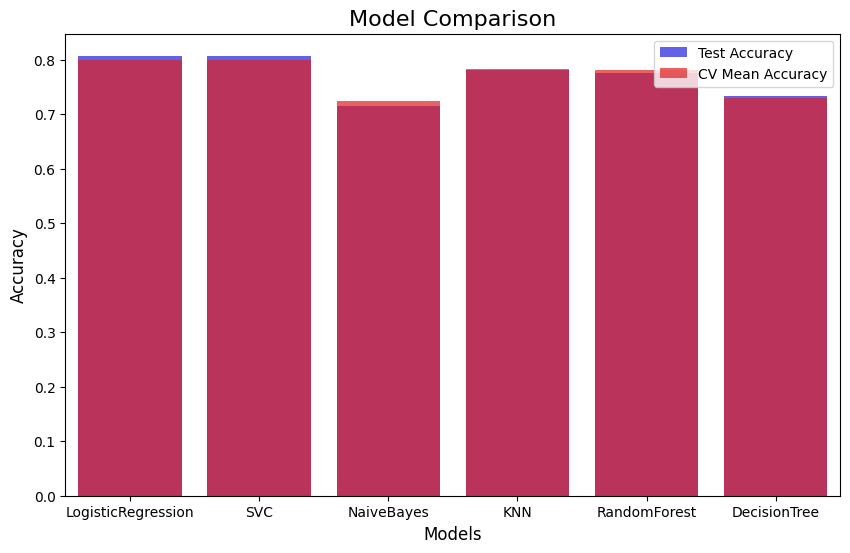

In [36]:
import streamlit as st
st.header('Model Comparison for Churn Prediction')

model_names = list(results.keys())
accuracies = [result['Accuracy'] for result in results.values()]
cv_mean_accuracies = [result['CV Mean Accuracy'] for result in results.values()]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, ax=ax, color='blue', alpha=0.7, label='Test Accuracy')
sns.barplot(x=model_names, y=cv_mean_accuracies, ax=ax, color='red', alpha=0.7, label='CV Mean Accuracy')

ax.set_title('Model Comparison', fontsize=16)
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.legend()

st.pyplot(fig)


In [39]:
%%writefile new_train_churn_models.py
import pandas as pd
import numpy as np

from scipy.stats import boxcox

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import joblib

# ---------------------------
# 1. Load and Preprocess Data
# ---------------------------
df = pd.read_csv("/content/telco-customer-churn.csv")

# Convert TotalCharges to numeric and fill missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Apply Box-Cox transformation
df['TotalCharges_boxcox'], _ = boxcox(df['TotalCharges'] + 1e-6)
df.drop('TotalCharges', axis=1, inplace=True)
df.rename(columns={'TotalCharges_boxcox': 'TotalCharges'}, inplace=True)

# Save the preprocessed data to CSV for future reference
df.to_csv("preprocessed_customer_churn.csv", index=False)
print("Preprocessed data saved as preprocessed_customer_churn.csv")

# ---------------------------
# 2. Feature and Target Setup
# ---------------------------
# Drop customerID and use Churn as the target
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

# Define feature lists
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

# ---------------------------
# 3. Create Preprocessing Pipelines
# ---------------------------
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Feature selection (select top 10 features based on mutual information)
feature_selector = SelectKBest(score_func=mutual_info_classif, k=10)

# ---------------------------
# 4. Split Data and Transform
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_train_selected = feature_selector.fit_transform(X_train_processed, y_train)

# Transform the test data
X_test_processed = preprocessor.transform(X_test)
X_test_selected = feature_selector.transform(X_test_processed)

# ---------------------------
# 5. Train and Evaluate 4 Models
# ---------------------------
models_dict = {}

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)  # enabling probability estimates
}

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)
    models_dict[name] = {"model": model, "accuracy": acc}
    print(f"{name} Accuracy: {acc:.4f}")

# ---------------------------
# 6. Save the Models and Pipelines
# ---------------------------
# Save a dictionary containing the trained models, preprocessor, and feature selector
joblib.dump({
    "models": models_dict,
    "preprocessor": preprocessor,
    "feature_selector": feature_selector
}, "churn_models.pkl")
print("Models and preprocessing pipeline saved as churn_models.pkl")


Overwriting new_train_churn_models.py


In [40]:
!python new_train_churn_models.py

Preprocessed data saved as preprocessed_customer_churn.csv
Logistic Regression Accuracy: 0.8070
Decision Tree Accuracy: 0.7317
KNN Accuracy: 0.7793
SVM Accuracy: 0.8062
Models and preprocessing pipeline saved as churn_models.pkl


In [42]:
%%writefile customer_churn.py
#importing Necessary Libraries
import streamlit as st
import numpy as np
import pandas as pd

import os
from ydata_profiling import ProfileReport
import sweetviz as sv
import streamlit.components.v1 as components

import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold #Import the necessary function

models_dict = joblib.load("customer_churn_model.pkl")

st.markdown("""
    <h1 style='text-align: center; color: #FF5733; font-family: Verdana, sans-serif; font-size: 40px;'>
        📊 Customer Churn Prediction & Retention Analysis
    </h1>
""", unsafe_allow_html=True)
# Create empty columns for centering
col1, col2, col3 = st.columns([1, 2, 1])

with col2:  # Center column
    st.image("/content/images.png", caption="Customer Churn Analysis", width=300)

for name, data in models_dict.items():
    st.write(f"**{name}**: Accuracy = {data['Accuracy']:.4f}")

uploaded_file=st.file_uploader("Upload Your Customer Churn Dataset",type="csv")
if uploaded_file is not None:
  df = pd.read_csv(uploaded_file)

  # Sidebar for user input
  st.sidebar.header('Customer Details')
  tenure = st.sidebar.number_input('Tenure (Months)', min_value=1, max_value=72, value=12)
  monthly_charges = st.sidebar.number_input('Monthly Charges', min_value=0.0, max_value=200.0, value=60.0)
  total_charges = st.sidebar.number_input('Total Charges', min_value=0.0, max_value=10000.0, value=500.0)

  # Categorical Inputs
  gender = st.sidebar.selectbox('Gender', ['Male', 'Female'])
  partner = st.sidebar.selectbox('Partner', ['Yes', 'No'])
  dependents = st.sidebar.selectbox('Dependents', ['Yes', 'No'])
  phone_service = st.sidebar.selectbox('Phone Service', ['Yes', 'No'])
  multiple_lines = st.sidebar.selectbox('Multiple Lines', ['Yes', 'No', 'No phone service'])
  online_security = st.sidebar.selectbox('Online Security', ['Yes', 'No', 'No internet service'])
  online_backup = st.sidebar.selectbox('Online Backup', ['Yes', 'No', 'No internet service'])
  device_protection = st.sidebar.selectbox('Device Protection', ['Yes', 'No', 'No internet service'])
  tech_support = st.sidebar.selectbox('Tech Support', ['Yes', 'No', 'No internet service'])
  streaming_tv = st.sidebar.selectbox('Streaming TV', ['Yes', 'No', 'No internet service'])
  streaming_movies = st.sidebar.selectbox('Streaming Movies', ['Yes', 'No', 'No internet service'])
  contract = st.sidebar.selectbox('Contract', ['Month-to-month', 'One year', 'Two year'])
  paperless_billing = st.sidebar.selectbox('Paperless Billing', ['Yes', 'No'])
  payment_method = st.sidebar.selectbox('Payment Method', ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])

 # Prepare the input data in the correct format for prediction
  new_customer = pd.DataFrame({
  'tenure': [tenure],
  'MonthlyCharges': [monthly_charges],
  'TotalCharges': [total_charges],
  'gender': [gender],
  'Partner': [partner],
  'Dependents': [dependents],
  'PhoneService': [phone_service],
  'MultipleLines': [multiple_lines],
  'OnlineSecurity': [online_security],
  'OnlineBackup': [online_backup],
  'DeviceProtection': [device_protection],
  'TechSupport': [tech_support],
  'StreamingTV': [streaming_tv],
  'StreamingMovies': [streaming_movies],
  'Contract': [contract],
  'PaperlessBilling': [paperless_billing],
  'PaymentMethod': [payment_method]
  })

  new_encoded_customer=pd.get_dummies(new_customer,drop_first=True)
  new_customer = new_encoded_customer.reindex(columns=df.columns, fill_value=0)
  new_customer.dropna(inplace=True)

  model = joblib.load("customer_churn_model.pkl")
  if st.sidebar.button('Predict'):
    y_pred_new = model.predict(new_customer)
    if y_pred_new == "1":
      st.subheader('Churn Prediction: This customer is likely to churn.')
    else:
      st.subheader('Churn Prediction: This customer is likely to stay.')
    st.sidebar.write(f"### Prediction: {y_pred_new}")

  col1, col2 = st.columns([2, 4])  # Adjust width ratio (2:1 for left:right)
  with col1:
    st.subheader('Customer Details')

    st.subheader('Data Preview:')
    st.write(df.head())
    st.subheader('Data Summary:')
    st.write(df.describe().T)
    st.write('Correlation Matrix:')
    st.write(df.select_dtypes(include=["int64","float64"]).corr())
    st.subheader("Correlation Heatmap")
    # Compute the correlation matrix
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(df.select_dtypes(include=["int64","float64"]).corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
    st.pyplot(fig)
    st.write('Class Distribution')
    st.write(df['Churn'].value_counts())
  with col2:
    with st.expander("📊 Automated EDA (Click to Expand)", expanded=True):
    # Streamlit UI
      st.title("Automated EDA Tool")

      # Select EDA Tool
      eda_tool = st.selectbox("Choose an EDA Tool", ["pandas-profiling", "Sweetviz"])

      if st.button("Generate EDA Report"):
        if eda_tool == "pandas-profiling":
          profile = ProfileReport(df, explorative=True)
          profile_path = "eda_report.html"
          profile.to_file(profile_path)

      # Display report in Streamlit
          with open(profile_path, "r", encoding="utf-8") as f:
              html_content = f.read()
          components.html(html_content, height=800, scrolling=True)

        elif eda_tool == "Sweetviz":
          report = sv.analyze(df)
          report.show_html("eda_report.html", open_browser=False)
          st.success("EDA Report Generated!")
          st.markdown("[Download Report](./eda_report.html)")

      # Display report in Streamlit
          with open("eda_report.html", "r", encoding="utf-8") as f:
              html_content = f.read()
          components.html(html_content, height=800, scrolling=True)

  # Model comparison graph

  # Customer churn prediction


  # Churn Rate Analysis - Display Churn Rate Over Time
  st.header('Churn Rate Analysis')
  # Placeholder for real-time churn rate tracking (this can be expanded with real data)
  churn_rate_data = pd.DataFrame({
  'Month': [1, 2, 3, 4, 5, 6],
  'Churn Rate (%)': [5, 6, 5.5, 7, 6.8, 8]
  })

  st.line_chart(churn_rate_data.set_index('Month'))

  # Reasons for Churn - Placeholder
  st.header('Reasons for Churn')
  churn_reasons = ['Network Issues', 'Pricing Concerns', 'Service Dissatisfaction', 'Others']
  st.write(f'Most common reasons for churn are: {", ".join(churn_reasons)}')

  # Retention Strategies - Placeholder
  st.header('Retention Strategies')
  st.write('Personalized retention strategies include: Offering discounts, Cashback, Improved Service Quality.')

  # Revenue Impact Assessment
  st.header('Revenue Impact of Churn and Retention Efforts')
  st.write('Churn significantly impacts revenue. Retaining customers with targeted offers can mitigate this loss.')





Overwriting customer_churn.py


In [49]:
!streamlit run churn_app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.139.53.208


In [ ]:
!npx localtunnel --port 8501

⠙your url is: https://proud-lands-smash.loca.lt
